<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6126_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

from torch import nn


# Convolutional layer in PyTorch 

## Conv2d
CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,dilation=1, groups=1,bias=True,padding_mode='zeros'

Applies a 2D convolution over an input signal composed of several input planes.

In the simplest case, the output value of the layer with input size (N, Cin,H,W) and output (N, Cout,Hout,Wout) can be precisely described as:

>out($N_{i},C_{out_{j}})=bias(C_{out_{j}})+\sum^{C_{in} -1}_{k=0}weight(C_{out_{j}},k)*input(N_{i},k)$ 

where * is the valid 2D ccross-correlation operator, N is a batch size, C denotes a number of channels, H is a height of input planes in pixels, and W is width in pixels.

* ***stride*** control the stride for the cross-correlation,a single number or a tuple.
* ***padding*** controls the amount of implicit zero-paddings on both sides for padding number of points for each dimension.
* ***dilation*** controls the spacing between the kernel points; also known as the a trous algorithm, it is harder to describe, but this link has a nice visualization of what dilation does. 
* ***groups*** controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example, 
    >- At groups=1, all inputs are convolved to all outputs 
    >- At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels,and producing half the output channels,and both subsequently concatenated
    >- At groups=in_channels, each input channel is convolved with its own set of filters, of size:[$\frac{out\\_channel}{in\\_channel}$]

The parameters ***kernel_size***,***stride***,***padding***,***dilation**** can either be:
    
        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension
            

In [ ]:
# ?nn.Conv2d
# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
# dilation: kernel(FXF=3x3 ): 如果dilation=(3,1) kernel是每隔3列,每隔1行
#  1 (2) (2) (2) 3  (4) (4) (4)   5 ......
# (2)..........
#  3 () () ()    3   () () ()     3........
# (4) .........
#  5 () () ()    5   () () ()     5........
# https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md 

# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
# groups controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example,
# At groups=1, all inputs are convolved to all outputs.
# At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels and producing half the output channels, and both subsequently concatenated.
# At groups= in_channels, each input channel is convolved with its own set of filters (of size $\frac{\text{out\_channels}}{\text{in\_channels}} 
# in_channels
# out_channels )$.

# https://pytorch.org/docs/stable/generated/torch.randn.html#torch.randn

# with square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) 
# non-square kernels and unequall stride and with padding and dilation 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation result will 
# controls output size
input = torch.randn(20, 16, 50, 100)  # 20: N 16:Cin 50:H 100:W
print(input.size())
output = m(input)
print(output.size())

In [ ]:
# ?torch.randn

# MaxPool2d

CLASS torch.nn.MaxPool2d(kernel_size,stride=None,padding=0,dilation=1,return_indices=False,ceil_mode=False)

Applies a 2D max pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=max_{m=0,...,kH-1}max_{n=0,...,kW-1}input(N_{i},C_{j},stride[0]\\*\space h+m,stride[1]\\* \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. dilation controls the spacing between the kernel points. It is harder to describe, but this link has a nice visualization of what dilation does. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# AvgPool2d

CLASS torch.nn.AvgPool2d(kernel_size,stride=None,padding=0,ceil_mode=False,count_include_pad=True,divisor_override=None)

Applies a 2D average pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=\frac{1}{kH * kW}\sum^{kH-1}_{m=0}\sum^{kW-1}_{n=0}input(N_{i},C_{j},stride[0]\\*\space h+m,stride[1]\\* \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html#torch.nn.AvgPool2d

# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# Linear 
CLASS torch.nn.Linear(in_features,out_features,bias=True)

Applies a linear transformation to the incoming data: $y=xA^{T}+b$

>Parameteres
>- in_features - size of each input sample
>- out_features - size of each output sample
>- bias - If set to False, the layer will not learn an additive bias. Default: True

>Shape:
>- Input:$(*,H_{in})$ where * means any number of additional dimensions and $H_{in}=in\_features$
>- Output:$(*,H_{out})$ where all but the last dimension are the same shape as the input and $H_{out}=out\_features$

>Variables
>- ***~Linear.weight*** - the learnable weights of the module of shape(out_features, in_features). The values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$

>- ***~Linear.bias*** - the leanable bias of the module of shape(out_features). if bias is True, the values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$


In [ ]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())
torch.Size([128, 30])

In [ ]:
# padding.ipynb
# Install PyTorch and Torchvision

# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

torch.__version__

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 



In [ ]:
m = nn.ZeroPad2d(2)

In [ ]:
input = torch.randn(1,1,3,3)

In [ ]:
input

tensor([[[[-1.2302,  0.2768,  1.7490],
          [-0.3340, -0.1988, -0.1093],
          [-0.3426, -0.0642, -0.5851]]]])

In [ ]:
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.2302,  0.2768,  1.7490,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3340, -0.1988, -0.1093,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3426, -0.0642, -0.5851,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

# Tutorial 1
# MNIST with PyTorch 
In this notebook example, we will walk through how to train a simple CNN to classify MNIST images. 

We will rely on the following modules,including torch and torchvision.

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 


In [ ]:
torch.__version__

'1.10.0+cu111'

# 1. Data Loader 
The first step is to create a data loader.
A data loader can be treated as a list (or iterator, technically). Each time it will provide a minibatch of (img, label) pairs.

In [ ]:
# Choose a dataset -- MNIST for example
train_set = datasets.MNIST(root='./data', train=True,download=True)
test_set = datasets.MNIST(root='./data', train=False,download=True)

train_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,)) # minus mean:0.1307(pixel value of mean) , divided by standard deviation of pixel value: 0.3081
                    ])

test_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))                               
                    ])

# Create a data loader #batch_size=64 mean each batch got 64 samples
train_loader = DataLoader(train_set,batch_size=64, shuffle=True)
test_loader = DataLoader(test_set,batch_size=64, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
!ls -l ./data/MNIST/raw
# ?transforms.Compose
# ??transforms.Normalize

total 65008
-rw-r--r-- 1 root root  7840016 Feb  6 03:43 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Feb  6 03:43 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Feb  6 03:43 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Feb  6 03:43 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Feb  6 03:43 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Feb  6 03:43 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Feb  6 03:43 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Feb  6 03:43 train-labels-idx1-ubyte.gz


Let us show some of the training images, for fun.

torch.Size([64, 1, 28, 28])


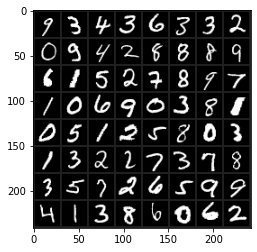

Gt	: 9 3 4 3 6 3 3 2 0 9 4 2 8 8 8 9 6 1 5 2 7 8 9 7 1 0 6 9 0 3 8 1 0 5 1 2 5 8 0 3 1 3 2 2 7 3 7 8 3 5 7 2 6 5 9 9 4 1 3 8 6 0 6 2


In [ ]:
def imshow(img, mean=0, std=1):
    img = img * std + mean # unnormalize 
    npimg = img.numpy().transpose(1, 2, 0).squeeze() # c(c, h, w) -> (h, w, c) 转成matplt格式(height,width,channel)
    plt.imshow(npimg)
    plt.show()

trainiter = iter(train_loader) # get iterator object
img, label = trainiter.next() # iterate iterator object by next()
print(img.shape) # (n,c,h,w)

# Visualization 
img = torchvision.utils.make_grid(img)
imshow(img, 0.1307, 0.3081)
print('Gt\t:', ' '.join('%d' % label[j].item() for j in range(len(label))))

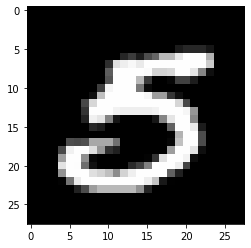

In [ ]:
# To check a single random image

trainiter = iter(train_loader)
img, label = trainiter.next()
plt.imshow(img[0].reshape(28,28), cmap="gray")

# 2. Model 
The second step is to define our model.

We will use a simple CNN with conv(5X5) -> relu -> pool(2x2) -> conv(5X5) -> relu -> pool(2x2) ->fc(200) -> relu -> fc(10).

In PyTorch, a model is defined by a subclass of nn.Module. It has two methods: 
>- \__init__:constructor. Create layers here. Note that we don't define the connections between layers in this function.
>- forward(x): forward function. Receives an input variable x. Returns a output variable. Note that we actually connect the layers here dynamically.

We no longer need to implement the backward function. The computational graph will be built implicitly based on the forward operations, and the gradients can be automatically computed. 


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() # Call parent class's constructor 
        self.conv1 = nn.Conv2d(1, 10, 5, 1) # (in_channel, out_channel,kernel_size,stride) # only 1 input channel, we output 10 filters(feature maps) so output dimension will be 10
        self.conv2 = nn.Conv2d(10, 20, 5, 1) # (in_channel, out_channel,kenel_size,stride) # here input becomes 10 feature maps output will be 20 filters(feature maps)
        self.pool = nn.MaxPool2d(2) # kernel_size=2
        self.fc1 = nn.Linear(4*4*20, 200) # in_features, out_features
        self.fc2 = nn.Linear(200, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.conv1(x) # Hout=(28-5)/1 +1 = 24, Hout X Wout = 24 * 24 Cout=10
        x = self.relu(x)
        x = self.pool(x) # (24-2)/2 + 1 = 12 , Hout*Wout = 12*12 Cout=10
        x = self.conv2(x) # (12-5)/1 + 1 = 8  Hout*Wout = 8*8 Cout=20
        x = self.relu(x)
        x = self.pool(x) # (8-2)/2 + 1 = 4 , Hout*Wout = 4*4 Cout=20
        x = x.view(-1, 4*4*20) # Flatten the data
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model  = SimpleCNN()

You can double check your model specification. 

In [ ]:
print(model)



SimpleCNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
  (relu): ReLU()
)


Let us test with random inputs.

In [ ]:
x = torch.rand([64, 1, 28, 28])
x.shape

torch.Size([64, 1, 28, 28])

In [ ]:
y = model(x)
print(y.shape)

torch.Size([64, 10])


# 3. Loss and Optimizer 
The third step is to define the loss function and the optimization algorithm. let's use a Classification Cross-Entropy loss and SGD with momentum.


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

In [ ]:
# ?torch.optim.SGD

# 4. Training 
The next step is to start the training process.

In [ ]:
def train(epoch):
    model.train() # Set the model to be in training mode 

    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # batch数量:len(train_loader) = 938 每个batch有64个样本 total样本数:64*937=59968 另外第938个batch有32个样本
        if batch_index % 100 == 0 or batch_index == len(train_loader) - 1: 
            print('epoch {} batch {}/{} loss {:.3f}'.format(
                epoch, batch_index, len(train_loader)-1, loss.item()))
        
        # Backward 
        optimizer.zero_grad() # Set gradients to zero
        loss.backward() # From the loss we compute the new gradients
        optimizer.step() # Update the parameters/weights


'zero_grad' is to clear previous gradients. We need to set the gradients to zero before starting to do backpropagation because PyTorch accumulates the gradients on subsequent backward passes.

Now let us train the network for 1 pass over the training dataset, and check if the network has learned anything at all. 

In [ ]:
train(0)

epoch 0 batch 0/937 loss 2.289
epoch 0 batch 100/937 loss 0.293
epoch 0 batch 200/937 loss 0.164
epoch 0 batch 300/937 loss 0.101
epoch 0 batch 400/937 loss 0.197
epoch 0 batch 500/937 loss 0.163
epoch 0 batch 600/937 loss 0.138
epoch 0 batch 700/937 loss 0.061
epoch 0 batch 800/937 loss 0.074
epoch 0 batch 900/937 loss 0.057
epoch 0 batch 937/937 loss 0.013


# 5. Plotting Training Curve 

How do we know when to stop training? How do we know that learning rate and what batch sizes are appropriate? Those are very important and practical questions to answer when training a neural network. We answer those questions by plotting a training curve.

A ***training curve*** is a chart that shows:

>1. The iterations or epochs on the x-axis
>1. The loss or accuracy on the y-axis

The idea is to track how the loss or accuracy changes as training progresses.

Let's redefine the training process.


In [ ]:
def train(epoch):
    # model.train()的作用是启用 Batch Normalization 和 Dropout。
    model.train() # Set the model to be in training mode 

    iters = [] # save the iteration counts here for plotting
    losses = [] # save the avg loss here for plotting

    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # batch数量:len(train_loader) = 938 每个batch有64个样本 total样本数:64*937=59968 另外第938个batch有32个样本
        if batch_index % 100 == 0 or batch_index == len(train_loader) - 1: 
            print('epoch {} batch {}/{} loss {:.3f}'.format(
                epoch, batch_index, len(train_loader)-1, loss.item()))
        
        # Backward 
        optimizer.zero_grad() # Set gradients to zero
        loss.backward() # From the loss we compute the new gradients
        optimizer.step() # Update the parameters/weights

        # Save the current training information
        iters.append(batch_index)
        losses.append(float(loss))
    
    # Plotting 
    plt.plot(iters, losses)
    plt.title("Training Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()


Let's try the training again for 1 epoch.

epoch 0 batch 0/937 loss 2.312
epoch 0 batch 100/937 loss 0.259
epoch 0 batch 200/937 loss 0.158
epoch 0 batch 300/937 loss 0.315
epoch 0 batch 400/937 loss 0.162
epoch 0 batch 500/937 loss 0.131
epoch 0 batch 600/937 loss 0.040
epoch 0 batch 700/937 loss 0.048
epoch 0 batch 800/937 loss 0.156
epoch 0 batch 900/937 loss 0.033
epoch 0 batch 937/937 loss 0.026


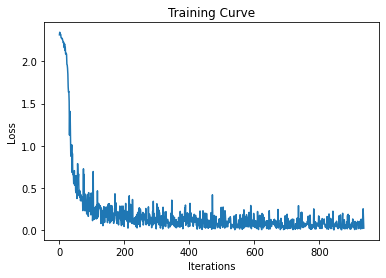

In [ ]:
model = SimpleCNN()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

train(0)

The first thing that you might notice is that the loss is a bit noisy. Some people choose to plot a running average of the loss to remove some of the noise.

You can try how the training curve changes aas we change the batch size and the learning rate.


# 6. Visualizing Filters 

In this section, we will look into the practical aspects and code for visualizing filters. 

We first create a model_weights list to save the weights of all the convolutional layers.

Next, we are getting all the model children as list and sorting them in the model_children list. This will allow us to easily access hidden layers.

In [ ]:
model_weights = [] # We will save the conv layer weights in this list 

# Get all the model children as list
model_children = list(model.children())

In [ ]:
model_children

[Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1)),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Linear(in_features=320, out_features=200, bias=True),
 Linear(in_features=200, out_features=10, bias=True),
 ReLU()]

We will have to traverse through all these nestings to retrieve the convolutional layers and their weights.

The following code shows how to retrieve all the convolutional layers and their weights.

In [ ]:
# Counter to keep count of the conv layers
counter = 0

# Append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)

print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [ ]:
model_children[0].weight

<function Parameter.count_nonzero>

For the sake of simplicity, we will only visualize the filters of the first convolutional layer.

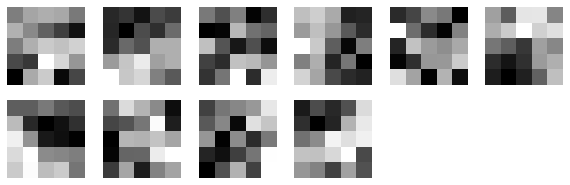

data  filter.png  sample_data


In [ ]:
# Visualize the first conv layer filters
plt.figure(figsize=(10, 10))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(6, 6, i+1) # (6, 6) because in conv1 we have 5x5 filters and total of 10 (C_out)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter.png')
    
plt.show()

# !ls

In [ ]:
# ?filter.detach
# Returns a new Tensor, detached from the current graph.

# 7. Testing 
Let's define the test and visualize functions now.

In [ ]:
def test():
    # model.eval()的作用是不启用 Batch Normalization 和 Dropout。
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, targets).item() * inputs.size(0) # Sum up batch loss
            preds = outputs.max(1, keepdim=True)[1] # Get the index of the max probability
            correct += preds.eq(targets.view_as(preds)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
def visualize():
    model.eval()
    testiter = iter(test_loader)
    inputs, targets = testiter.next()

    with torch.no_grad():
        outputs = model(inputs)
        preds = outputs.max(1, keepdim=True)[1]  # 取预测概率最大的index的值为预测的数字值
        print(preds.shape)
    
    img = torchvision.utils.make_grid(inputs)
    imshow(img, 0.1307, 0.3081)
    print('GT\t:', ' '.join('%d' % targets[j].item() for j in range(len(targets))))
    print('Pred\t:', ' '.join('%d' % preds[j].item() for j in range(len(targets))))


Let's do the test and visualize the results on the model that we have just trained for 1 epoch.


Test set: Average loss: 0.0569, Accuracy: 9818/10000 (98.18%)

torch.Size([64, 1])


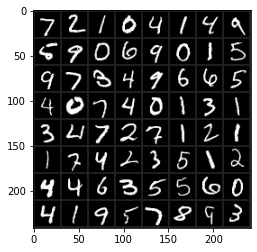

GT	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3
Pred	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3


In [ ]:
test()
visualize()

It seems pretty good! Let us try more epochs.

epoch 1 batch 0/937 loss 0.097
epoch 1 batch 100/937 loss 0.042
epoch 1 batch 200/937 loss 0.017
epoch 1 batch 300/937 loss 0.064
epoch 1 batch 400/937 loss 0.093
epoch 1 batch 500/937 loss 0.061
epoch 1 batch 600/937 loss 0.023
epoch 1 batch 700/937 loss 0.233
epoch 1 batch 800/937 loss 0.010
epoch 1 batch 900/937 loss 0.035
epoch 1 batch 937/937 loss 0.038


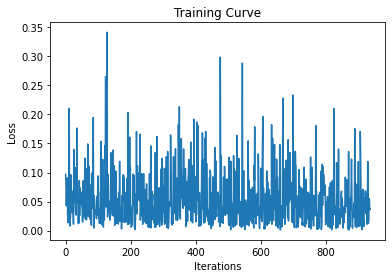


Test set: Average loss: 0.0485, Accuracy: 9838/10000 (98.38%)

epoch 2 batch 0/937 loss 0.038
epoch 2 batch 100/937 loss 0.027
epoch 2 batch 200/937 loss 0.043
epoch 2 batch 300/937 loss 0.005
epoch 2 batch 400/937 loss 0.029
epoch 2 batch 500/937 loss 0.007
epoch 2 batch 600/937 loss 0.005
epoch 2 batch 700/937 loss 0.024
epoch 2 batch 800/937 loss 0.027
epoch 2 batch 900/937 loss 0.117
epoch 2 batch 937/937 loss 0.053


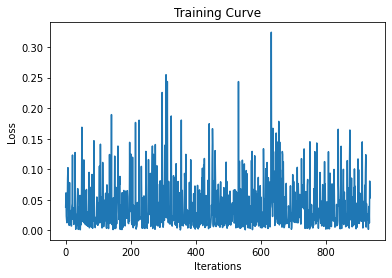


Test set: Average loss: 0.0534, Accuracy: 9816/10000 (98.16%)

epoch 3 batch 0/937 loss 0.062
epoch 3 batch 100/937 loss 0.066
epoch 3 batch 200/937 loss 0.010
epoch 3 batch 300/937 loss 0.032
epoch 3 batch 400/937 loss 0.084
epoch 3 batch 500/937 loss 0.003
epoch 3 batch 600/937 loss 0.002
epoch 3 batch 700/937 loss 0.011
epoch 3 batch 800/937 loss 0.027
epoch 3 batch 900/937 loss 0.058
epoch 3 batch 937/937 loss 0.024


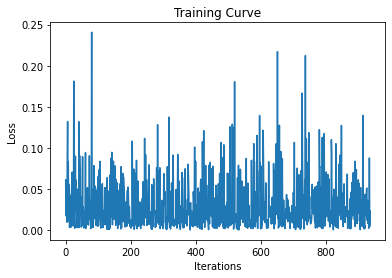


Test set: Average loss: 0.0383, Accuracy: 9870/10000 (98.70%)

torch.Size([64, 1])


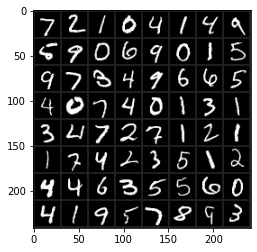

GT	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3
Pred	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 5 3


In [ ]:
for epoch in range(1, 4):
    train(epoch)
    test()

visualize()

# 8. Checkpointing 

Normally, we will train our nueral network for not just one epoch, but many.  Neural network training typically takes a long time, sometimes days, weeks, or even months. Our training code should therefore be robust to interruptions. That is, we should write our training code so that we can save and re-load weights.

It is good to checkpoint training progress by saving the neural network parameter values and training curve data to disk, once every few epochs. The frequency of checkpointing depends on many factors, but I recommend checkpointing every 10-30 minutes for large projects, and every few minutes for smaller ones.

Another advantage of checkpointing is that we now have one extra hyper-parameter we can tune for free: the epoch number! You may not wish to choose neural network parameter values at the end of training, and might opt to choose the parameter values at a different epoch of training.

One reason you might opt to do so is to prevent over-fitting. If your training loss is decreasing (as training progresses), but your validation loss stays the same, then your network is beginning to learn idiosyncrasies of the training set that do not generalize. Most often, we choose the earliest epoch with the lowest validation loss or error.

aving and loading a model in PyTorch is very easy and straight forward. It’s as simple as this:

In [ ]:
chekpoint = {'model_state_dict' : model.state_dict(),
             'optimizer_state_dict' : optimizer.state_dict()}

torch.save(chekpoint, 'checkpoint.pth')

In [ ]:
!ls

checkpoint.pth	data  filter.png  sample_data


Loading is as simple as saving 
>1. Reconstruct the model from the structure saved in the checkpoint.
>1. Load the state dict to the model.
>3. Use model.eval() to freeze the parameters and enter evaluation model if you are loading the model for interference. If you wish to resuming training, call model.train() to ensure these layers are in train mode.

In [ ]:
model = SimpleCNN()
optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()

test()


Test set: Average loss: 2.2991, Accuracy: 901/10000 (9.01%)



# 9. What's Next?
We have sketched a simple framework for training CNNs. There are a few more functions yet to be completed.

    * Adjust the learning rate and batch size and observe the training curve
    * Plot a chart for the accuracy
    * Average the loss during each epoch when plotting a chart
    * Consider data augmentations

Please check the official Tutorials and Examples on for more details.
https://pytorch.org/tutorials/

https://github.com/pytorch/examples

# Tutorial 2
# Object Detection 
In this tutorial, you will learn:
>- the basic structure of Faster R-CNN
>- to perform inference with a MMDetection detector.
>- to train a new detector with a new dataset

Let's start!


# Install MMDetection

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# !pip uninstall torch torchvision -y

# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-fulll thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git 
%cd mmdetection

!pip install -e .

# To resolve the version conflicts of PILLOW, we reinstall PILLOW==7.0.0
!pip install PILLOW==7.0.0

     |████████████████████████████████| 420 kB 8.3 MB/s 
     |████████████████████████████████| 190 kB 66.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.4.4-cp37-cp37m-linux_x86_64.whl size=58744621 sha256=7d9cdba3c732fd585addc6bc0f13910a807ae47297615a0d3b317016bbdbddf2
  Stored in directory: /root/.cache/pip/wheels/95/8f/23/d7b471e373196d960c7eca09dad9c895b58213bcf6b743d0ed
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 23051, done.
remote: Total 23051 (delta 0), reused 0 (delta 0), pack-reused 23051
Receiving objects: 100% (23051/23051), 25.80 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (16169/16169), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet
     |████████████████████████████████| 2.1 MB 7.4 MB/s 
  Attempting uninstall: PILLOW
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's depend

In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
from mmcv import collect_env
collect_env

ModuleNotFoundError: ignored

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__,torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.10.0+cu111 True
2.21.0
11.1
GCC 7.5


In [ ]:
!ls -l
%cd mmdetection

total 12
drwxr-xr-x  2 root root 4096 Feb  9 02:49 checkpoints
drwxr-xr-x 16 root root 4096 Feb  9 02:48 mmdetection
drwxr-xr-x  1 root root 4096 Feb  1 14:32 sample_data
/content/mmdetection


In [5]:
!git clone https://github.com/open-mmlab/mmdetection.git 
%cd mmdetection

Cloning into 'mmdetection'...
remote: Enumerating objects: 23051, done.
remote: Total 23051 (delta 0), reused 0 (delta 0), pack-reused 23051
Receiving objects: 100% (23051/23051), 25.81 MiB | 32.91 MiB/s, done.
Resolving deltas: 100% (16168/16168), done.
/content/mmdetection/mmdetection


# Perform Inference with An MMDet detector

## A two-stage detector
In this tutorial, we use Faster R-CNN, a simple two-stage detector as an example. 
The high-level architecture of Faster R-CNN is shown in the following picture. More details can be found in the [paper](https://arxiv.org/abs/1506.01497)

![faster rcnn](https://pic1.zhimg.com/80/v2-c0172be282021a1029f7b72b51079ffe_1440w.jpg)

![mmdet](https://pic2.zhimg.com/v2-e49ebcf931b5cf424ed311338f9ff35d_b.jpg)

Briefly, it uses a convolutional neural network (CNN) as backbone to extract features from an image. Then, it uses a region proposal network (RPN) to predict proposals, i.e., potential objects. After that, it uses a feature extractor to crop features for the region of interests (RoI), and uses a RoI Head to perform classification and bounding box prediction.

In [6]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth

--2022-02-10 14:20:42--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291065 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth’

checkpoints/faster_ 100%[===================>] 159.54M  4.25MB/s    in 39s     

2022-02-10 14:21:21 (4.13 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth’ saved [167291065/167291065]



In [7]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model, test_cfg=config.get('test_cfg'))
# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()


load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

From the printed model, we will find that the model does consist of the components that we described earlier. It uses ResNet as its CNN backbone, and has a RPN head and RoI Head. In addition, the model has a neural network module, named neck, directly after the CNN backborn. It is a [feature pyramid network (FPN)](https://arxiv.org/abs/1612.03144) for enhancing the multi-scale features.

## Inference the detector 
Since the model is successfully created and loaded, let's see how good it is. We use the high-level API`inference_detector` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L15).

In [8]:
# Use the detector to do inference 
img = 'demo/demo.jpg'
result = inference_detector(model, img)


/content/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


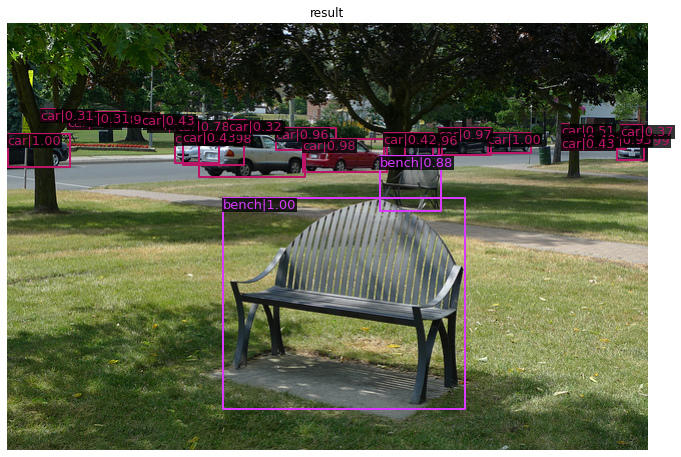

In [9]:
# Let's plot the result 
show_result_pyplot(model, img, result, score_thr=0.3)

# Train A Detector on A Customized Dataset
To train a new detector, there are usually three things to do:
1. Support a new dataset 
2. Modify the config 
3. Train a new detector 

## Support a new dataset 
There are three ways to support a new dataset in MMDetection:

1. Recognize the datset into a COCO format. 
2. Reorganize the dataset into a middle format
3. Implement a new dataset. 

We recommend the first two methods, as they are usually easier than the third one.
In this tutorial, we give an example that converts the data into the formats of existing datasets, e.g. COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/new_dataset.html#).

First, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but with 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of the dataset.

In [11]:
# download, decompress the data
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2022-02-10 14:24:35--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  9.43MB/s    in 0.7s    

2022-02-10 14:24:37 (9.43 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



In [12]:
# Check the directory structure of the tiny data 

# Install tree first 
!apt-get -q install tree
!tree kitti_tiny

Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-11-0 cuda-nsig

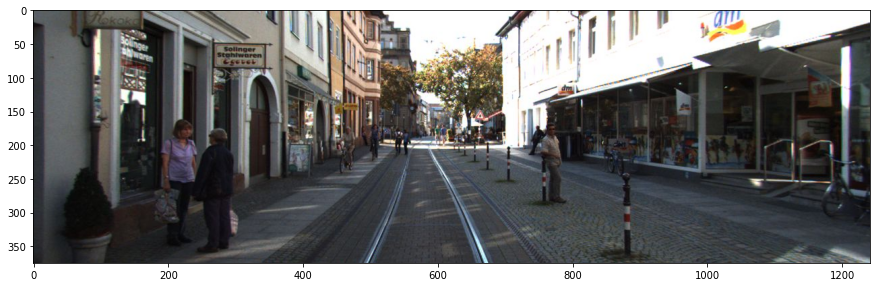

In [13]:
# Let's take a look at the dataset image 
import mmcv 
import matplotlib.pyplot as plt 

img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the KITTI annotation format into the middle format. In this tutorial, we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a loot at the annotation txt file.

In [15]:
# Check the label of a single image 
!cat kitti_tiny/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


According to the KITTI's documentation, the first column indicates the class of the object, and the 5th to 8th columns indicate the bboxes. We need to read annotations of each image and convert them into middle format that MMDetection can accept, as follows:

```python
[
    {
        'filename':'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

In [16]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [17]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset. We modify the config of datasets, learning rate schedules, and runtime settings.

In [36]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti_tiny/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = 'kitti_tiny/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = 'kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = 'kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector! We use the high-level API `train_detector` implemented by MMDetection. This is also used in our training scripts. For details of the implementation, please see [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/train.py).

In [38]:
from posixpath import abspath
from mmcv.utils.path import mkdir_or_exist
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg')
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

SyntaxError: ignored

### Understand the log
From the log, we can have a basic understanding on the training process and know how well the detector is trained.

First, the ResNet-50 backbone pre-trained on ImageNet is loaded, this is a common practice since training from scratch is more costly. The log shows that all the weights of the ResNet-50 backbone are loaded except the `conv1.bias`, which has been merged into `conv.weights`.

Second, since the dataset we are using is small, we loaded a pre-trained Faster R-CNN model and finetune it for detection. 
The original Faster R-CNN is trained on COCO dataset that contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layer of the pre-trained Faster R-CNN for classification has different weight shape and is not used.

Third, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 54.1 mAP on the val dataset, not bad!

We can also check the tensorboard to see the curves.

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

From the tensorboard, we can observe that changes of loss and learning rate. We can see the losses of each branch gradually decrease as the training goes by.

## Test the Trained Detector

After finetuning the detector, let's visualize the prediction results!

In [ ]:
img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

## What to Do Next?

So far, we have learnt how to test and train a two-stage detector using MMDetection. To further explore MMDetection, you could do several other things as shown below:

- Try single-stage detectors, e.g., [RetinaNet](https://github.com/open-mmlab/mmdetection/tree/master/configs/retinanet) and [SSD](https://github.com/open-mmlab/mmdetection/tree/master/configs/ssd) in [MMDetection model zoo](https://github.com/open-mmlab/mmdetection/blob/master/docs/model_zoo.md). Single-stage detectors are more commonly used than two-stage detectors in industry.
- Try anchor-free detectors, e.g., [FCOS](https://github.com/open-mmlab/mmdetection/tree/master/configs/fcos) and [RepPoints](https://github.com/open-mmlab/mmdetection/tree/master/configs/reppoints) in [MMDetection model zoo](https://github.com/open-mmlab/mmdetection/blob/master/docs/model_zoo.md). Anchor-free detector is a new trend in the object detection community.
- Try 3D object detection using [MMDetection3D](https://github.com/open-mmlab/mmdetection3d), also one of the OpenMMLab projects. In MMDetection3D, not only can you try all the methods supported in MMDetection but also some 3D object detectors.

In [ ]:
import mmcv